In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
x=np.linspace(0,50,501)

In [4]:
y=np.sin(x)

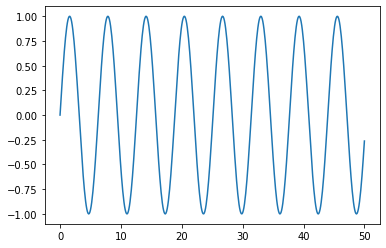

In [5]:
plt.plot(x,y)

In [6]:
df=pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:
test_percent=0.1

In [10]:
len(df)*test_percent

50.1

In [11]:
test_point=np.round(len(df)*test_percent)

In [12]:
test_point

50.0

In [13]:
test_ind=int(len(df)-test_point)

In [14]:
test_ind

451

In [15]:
train=df.iloc[:test_ind]

In [16]:
test=df.iloc[test_ind:]

In [17]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [18]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
# This time label is also to be scaled.

In [22]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
scaled_train=scaler.transform(train)

In [24]:
scaled_test=scaler.transform(test)

In [25]:
# Batch Generator

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [44]:
length = 25
batch_size = 1

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [45]:
len(scaled_train)

451

In [46]:
len(generator)

426

In [47]:
X,y=generator[0]

In [48]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [50]:
y

array([[0.79923759]])

In [51]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


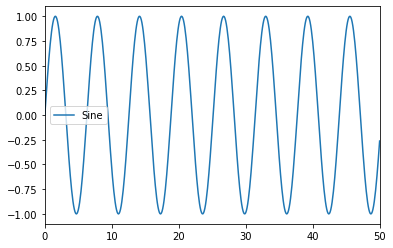

In [52]:
df.plot()

In [53]:
length=50
batch_size=1

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [56]:
n_features=1

In [58]:
model=Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 11s 27ms/step - loss: 0.0062
Epoch 2/5
401/401 [==============================] - 11s 27ms/step - loss: 9.0520e-04
Epoch 3/5
401/401 [==============================] - 10s 24ms/step - loss: 8.7757e-06
Epoch 4/5
401/401 [==============================] - 9s 22ms/step - loss: 1.2595e-05
Epoch 5/5
401/401 [==============================] - 9s 22ms/step - loss: 1.8897e-05


In [61]:
losses=pd.DataFrame(model.history.history)

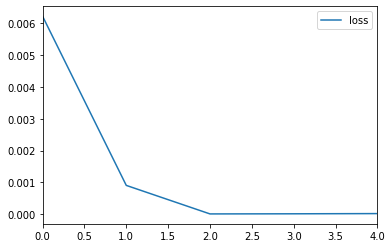

In [62]:
losses.plot()

In [63]:
first_eval_batch=scaled_train[-length:]

In [64]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
